In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']=20

## Mean UHI Analysis (nighttime)
How well does my station pairing method and results match Climate Central's mean UHI analysis? First, I read in data. 

In [16]:
## Read in the data
# # Take copy/pasted text and put it in a pandas dataframe
# table Table A2 from Climate Central's  
# testdf = pd.read_table('data/climatecentralUHI.txt', header = None)
# llist = []
# for i in range(0,testdf.shape[0]): 
#     llist.append(testdf.iloc[i].values[0].rsplit(' ',2))
# climate_central_analysis = pd.DataFrame(llist, columns=['City', 'UHI', 'X']).drop('X', axis =1)
# climate_central_analysis.to_csv('data/climatecentralUHI.csv')
# read in the climate central analysis 
ccdf = pd.read_csv('data/climatecentralUHI.csv').drop('Unnamed: 0',axis=1)
ccdf['UHI'] = ccdf['UHI']*5/9
# read in my analysis
mydf = pd.read_csv('plots/version3/US_results_cleaned_data.csv').drop('Unnamed: 0',axis=1).drop(2, axis=0)

Now, I find which cities are in common between the two methods. 

In [3]:
# What cities are in common between these two cities? 
combined_cities = np.intersect1d(ccdf, mydf.City)
print('Number of combined cities: %i'%combined_cities.shape, combined_cities)

('Number of combined cities: 43', array(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Birmingham',
       'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland',
       'Columbus', 'Dallas', 'Denver', 'Hartford', 'Houston',
       'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas',
       'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Minneapolis',
       'Nashville', 'New Orleans', 'Norfolk', 'Oklahoma City', 'Phoenix',
       'Pittsburgh', 'Portland', 'Providence', 'Raleigh', 'Richmond',
       'Sacramento', 'San Antonio', 'San Diego', 'Seattle', 'St. Louis',
       'Tampa', 'Tucson', 'Tulsa', 'Washington, D.C.'], dtype=object))


I plot the data for these cities to compare. 

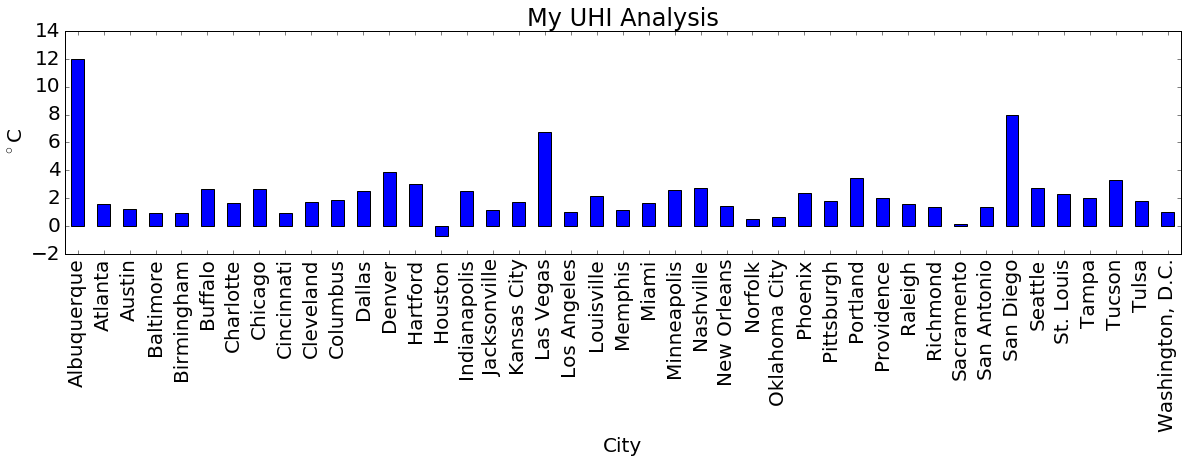

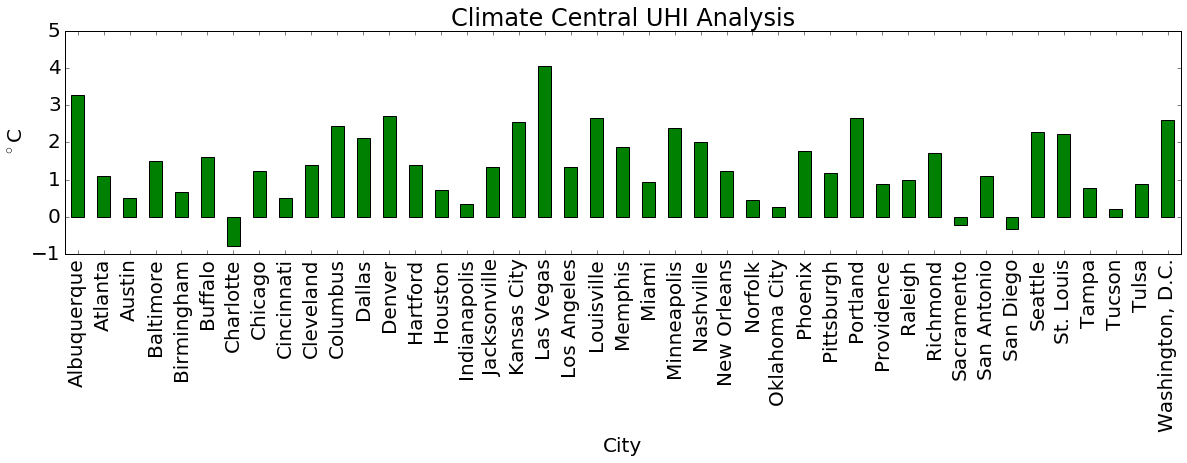

In [4]:
# plot the data
plt.figure(figsize=[20,4])
mydf.set_index('City').loc[combined_cities]['Mean UHI'].plot(kind = 'bar')
plt.title('My UHI Analysis')
plt.ylabel('$^\circ $C')
plt.figure(figsize=[20,4])
ccdf.set_index('City').loc[combined_cities]['UHI'].plot(color = 'green', kind= 'bar')
plt.title('Climate Central UHI Analysis')
plt.ylabel('$\Delta T$')
plt.ylabel('$^\circ $C')

In [5]:
combined_cities

array(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Birmingham',
       'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland',
       'Columbus', 'Dallas', 'Denver', 'Hartford', 'Houston',
       'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas',
       'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Minneapolis',
       'Nashville', 'New Orleans', 'Norfolk', 'Oklahoma City', 'Phoenix',
       'Pittsburgh', 'Portland', 'Providence', 'Raleigh', 'Richmond',
       'Sacramento', 'San Antonio', 'San Diego', 'Seattle', 'St. Louis',
       'Tampa', 'Tucson', 'Tulsa', 'Washington, D.C.'], dtype=object)

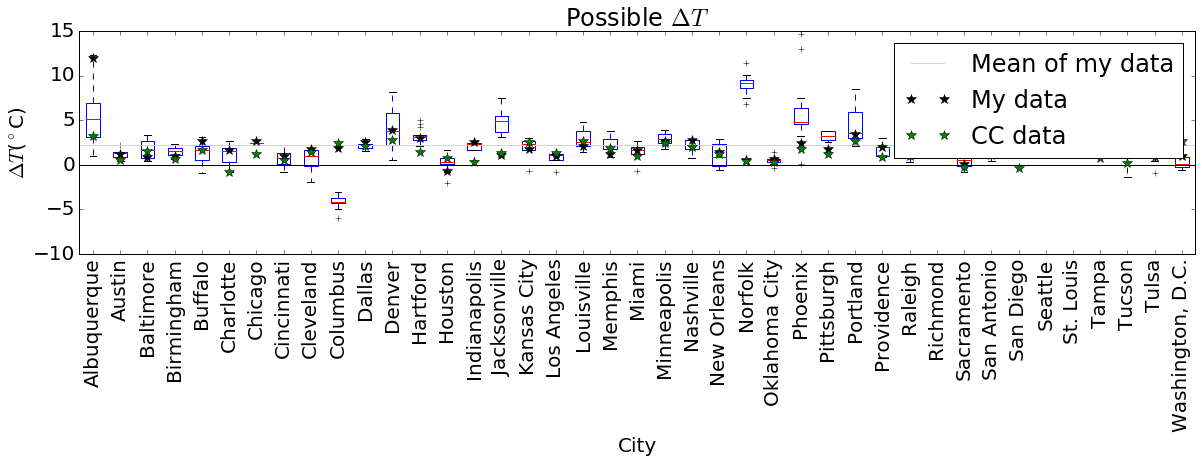

In [45]:
# Plot boxplots of UHI range
results_filepath = 'plots/version2/UHIvariance_brightness_thresh/'
cities = []
M_list = []
for city in combined_cities: 
    if city == 'Grand Prairie': 
        city = 'Arlington'
    try: 
        array = np.load(results_filepath+'UHIs/'+ city.replace(" ", "")[0:5]+'UHI.npy')
        array = array[~np.isnan(array)]
        M_list.append(array)
        if city =='Arlington': 
            cities.append('Grand Prairie')
        else: 
            cities.append(city)
    except IOError: 
        print('Skipping %s'%city)

plt.figure(figsize=[20,4])
ax = plt.subplot(111) 
ax.boxplot(M_list, vert = True)
ax.hold('True')

X= np.arange(1, len(cities)+1)
Y= mydf.set_index('City')['Mean UHI'][cities]# mydf['Mean UHI'][cities]
ax.axhline(Y.mean(), color = 'lightgray', label = 'Mean of my data')
ax.axhline(0, color = 'black', )
ax.plot( X, Y,'*',#'x', 
        color = 'black', markerSize = 10, label = 'My data')
ax.plot(X,  ccdf.set_index('City').loc[combined_cities]['UHI'],'*',#'x', 
        color = 'green', markerSize = 10, label = 'CC data')

ax.set_xlabel('City')
ax.set_xticklabels(cities, rotation = 90)
ax.set_ylabel('$\Delta T$($^\circ$C)')
ax.set_title('Possible $\Delta T$')
#plt.xlim([-1.5, .5])
plt.legend()

Next, I look at the difference for each city. By subtracting the two, I see if I'm under or overestimating. 

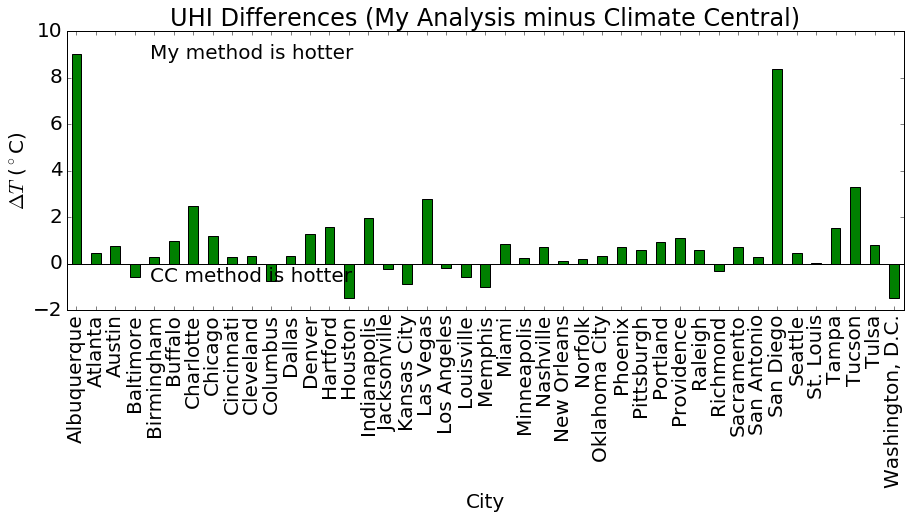

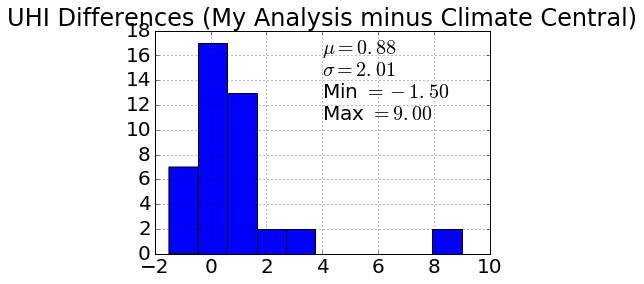

In [296]:
plt.figure(figsize=[15,5])
(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).plot(color = 'green', kind= 'bar')
plt.title('UHI Differences (My Analysis minus Climate Central)')
plt.ylabel('$\Delta T$ ($^\circ $C)')
plt.annotate('My method is hotter', xy = (.1, .9), xycoords='axes fraction')
plt.annotate('CC method is hotter', xy = (.1, .1), xycoords='axes fraction')
plt.axhline(0, color = 'black')
plt.figure()
(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).hist()
plt.annotate('$\mu = %.2f $'%(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).mean(), 
            xy=(.5, .9), xycoords='axes fraction')
plt.annotate('$\sigma = %.2f $'%(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).std(), 
            xy=(.5, .8), xycoords='axes fraction')
plt.annotate('Min $ = %.2f $'%(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).min(), 
            xy=(.5, .7), xycoords='axes fraction')
plt.annotate('Max $ = %.2f $'%(mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']).max(), 
            xy=(.5, .6), xycoords='axes fraction')
plt.title('UHI Differences (My Analysis minus Climate Central)')

My mean UHI analysis is similar to Climate Central's, though underestimates by almost one degree. Two cities, Albuquerque and San Diego are off by more than 6$^\circ C$; the rest only differ by $\pm 4 ^\circ $C. These two cities have the highest UHIs out of the citys I examined: Albuquerque has a UHI of 12 $^\circ C$ and San Diego has a UHI of 8 $^\circ $C. 

In [256]:
mydf.set_index('City').loc[combined_cities]['Mean UHI'][['Albuquerque','San Diego']]

City
Albuquerque    12.276432
San Diego       8.029632
Name: Mean UHI, dtype: float64

Also, mean differences appear to be driven by a few cities with large differences. When we remove the outliers, the mean difference is much lower: 

In [425]:
diff = mydf.set_index('City').loc[combined_cities]['Mean UHI']- ccdf.set_index('City').loc[combined_cities]['UHI']
print(diff[diff<4].mean(), diff[diff<4].std())

(0.49869459673322747, 1.0221727758441015)


## UHI Trend analysis (nighttime)
Next, I extend this analysis to the UHI trend. First, I read in data. 

In [17]:
# read in and format data 
# # # copy/paste in UHI trend in from pdf, table A4
# testdf = pd.read_table('data/climatecentralUHIchange.csv', header = None)
# llist = []
# for i in range(0,29): 
#     llist.append(testdf.iloc[i].values[0].rsplit(' ',1))# .replace(',',' ')
# for i in range(30, testdf.shape[0]): 
#     llist.append(testdf.iloc[i].values[0].rsplit(',',1))
# climate_central_analysis = pd.DataFrame(llist, columns=['City', 'UHI trend'])
# for item in llist: 
#     item[1] = item[1].replace(',', '')
# climate_central_analysis = pd.DataFrame(llist, columns=['City', 'UHI trend'])
# climate_central_analysis.to_csv('data/climatecentralUHItrend.csv')
ccUHIdf = pd.read_csv('data/climatecentralUHItrend.csv')
ccUHIdf['UHI trend'] = ccUHIdf['UHI trend']*5/9.*.1 # go from F/decade to C/year
ccUHIdf['UHI trend'] = ccUHIdf['UHI trend'].astype('float')*5/9.

Next, I check to see which cities I have in common. By redoing this, I see whether or not their city inventory changes with this analysis. 

In [18]:
# check if the same cities 
combined_cities = np.intersect1d(ccUHIdf, mydf.City)
print('Number of combined cities: %i'%combined_cities.shape, combined_cities)

('Number of combined cities: 41', array(['Albuquerque', 'Austin', 'Baltimore', 'Birmingham', 'Buffalo',
       'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus',
       'Dallas', 'Denver', 'Hartford', 'Houston', 'Indianapolis',
       'Jacksonville', 'Kansas City', 'Los Angeles', 'Louisville',
       'Memphis', 'Miami', 'Minneapolis', 'Nashville', 'New Orleans',
       'Norfolk', 'Oklahoma City', 'Phoenix', 'Pittsburgh', 'Portland',
       'Providence', 'Raleigh', 'Richmond', 'Sacramento', 'San Antonio',
       'San Diego', 'Seattle', 'St. Louis', 'Tampa', 'Tucson', 'Tulsa',
       'Washington, D.C.'], dtype=object))


Note that there are two fewer cities for this than for the mean UHI analysis. They didn't mention that they used different cities or why they did. It is possible this is a data reading error? 

In any case, I plot the data to compare values. 

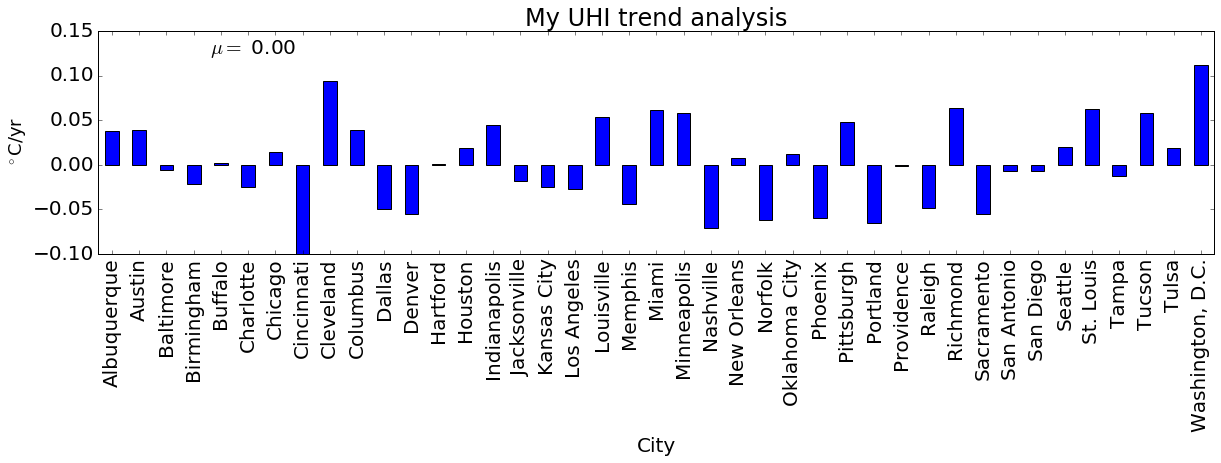

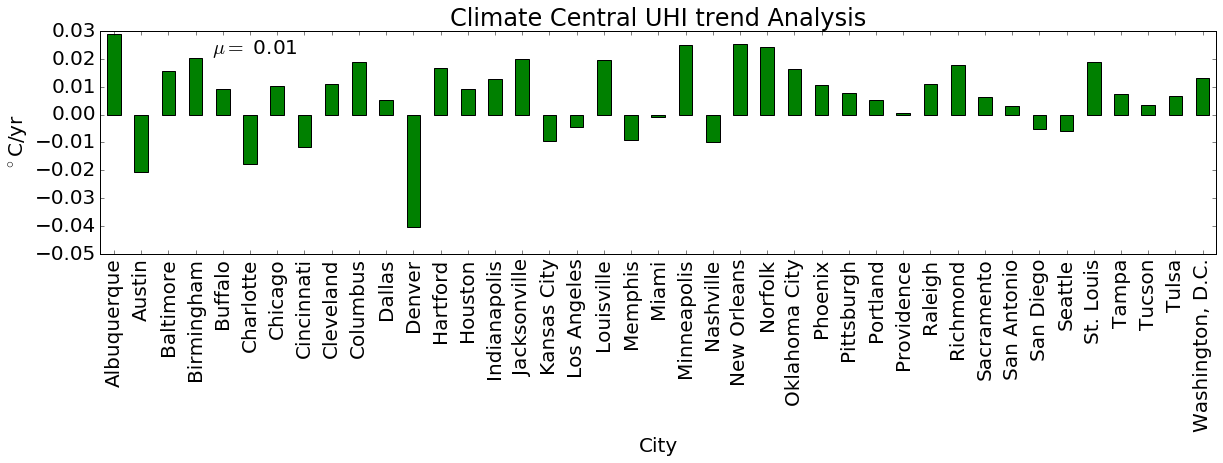

In [19]:
# plot the trend analysis for mine and CC
plt.figure(figsize=[20,4])
mydf.set_index('City').loc[combined_cities]['UHI linear trend'].plot(kind = 'bar')
plt.annotate('$\mu = $ %2.2f '%mydf.set_index('City').loc[combined_cities]['UHI linear trend'].mean(), 
            xy = (.1, .9), xycoords = 'axes fraction')
plt.title('My UHI trend analysis')
plt.ylabel('$^\circ $C/yr', fontsize=18)
plt.figure(figsize=[20,4])
ccUHIdf.set_index('City').loc[combined_cities]['UHI trend'].plot(color = 'green', kind= 'bar')
plt.title('Climate Central UHI trend Analysis')
plt.ylabel('$^\circ $C/yr')
plt.annotate('$\mu = $ %2.2f '%ccUHIdf.set_index('City').loc[combined_cities]['UHI trend'].mean(), 
             xy = (.1, .9), xycoords = 'axes fraction')

In [29]:
city = 'Kansas City'
array = np.load(results_filepath+'30yrtrend/'+ city.replace(" ", "")[0:5]+'30yrUHIslopes.npy')
array

array([-1.19469298,  2.55      , -0.02140193,  4.53636364,  0.01535385,
        0.06674151,  0.00598859,  0.33114754])

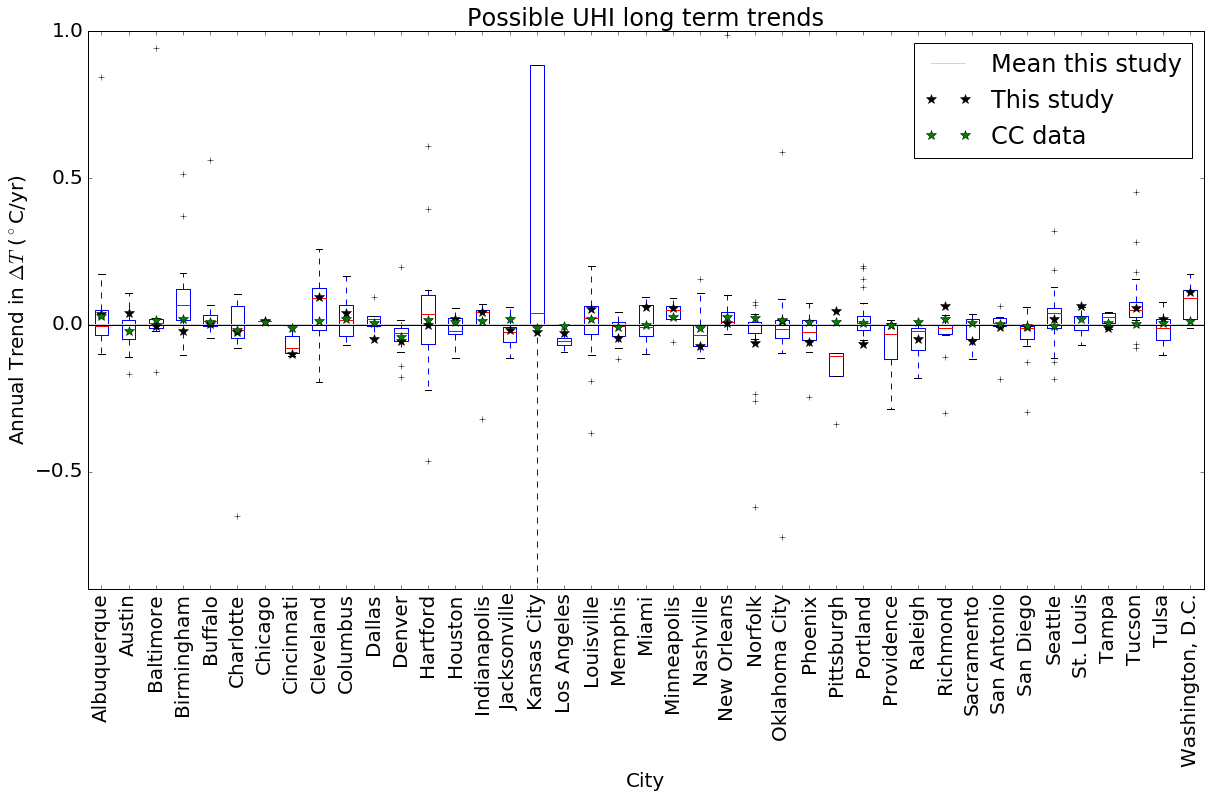

In [49]:
# Plot boxplots of UHI trend range
#results_filepath = 'plots/version2/UHIvariance_brightness_thresh/'
cities = []
M_list = []
for city in combined_cities: 
    if city == 'Grand Prairie': 
        city = 'Arlington'
    try: 
        array = np.load(results_filepath+'30yrtrend/'+ city.replace(" ", "")[0:5]+'30yrUHIslopes.npy')
        #array = np.load(results_filepath+'UHIs/'+ city.replace(" ", "")[0:5]+'UHI.npy')
        array = array[~np.isnan(array)]
        M_list.append(array)
        if city =='Arlington': 
            cities.append('Grand Prairie')
        else: 
            cities.append(city)
    except IOError: 
        print('Skipping %s'%city)

plt.figure(figsize=[20,10])
ax = plt.subplot(111) 
ax.boxplot(M_list, vert = True)
ax.hold('True')

X= np.arange(1, len(cities)+1)
Y= mydf.set_index('City')['UHI linear trend'][cities]# mydf['Mean UHI'][cities]
ax.axhline(Y.mean(), color = 'lightgray', label = 'Mean this study')
ax.axhline(0, color = 'black', )
ax.plot( X, Y,'*',#'x', 
        color = 'black', markerSize = 10, label = 'This study')
#ax.axhline(Y.mean(), color = 'black')
ax.plot(X,  ccUHIdf.set_index('City').loc[combined_cities]['UHI trend'],'*',#'x', 
        color = 'green', markerSize = 10, label = 'CC data')
#ax.axhline(ccUHIdf.set_index('City').loc[combined_cities]['UHI trend'].mean(), color = 'green')

ax.set_xlabel('City')
ax.set_xticklabels(cities, rotation = 90)

#plt.legend()
ax.set_ylabel('Annual Trend in $\Delta T$ ($^\circ$C/yr)')
ax.set_title('Possible UHI long term trends')
plt.ylim([-0.9, 1.0])
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc =1) #loc='upper left', 
                #bbox_to_anchor=(1.0,0.5))
plt.savefig(results_filepath+'allcitiesUHItrend.pdf', bbox_inches='tight')

In [42]:
print('Mean of Scott et al data is : ',Y.mean())

('Mean of Scott et al data is : ', 0.0025832996391293183)


In [30]:
results_filepath

'plots/version2/UHIvariance_brightness_thresh/'

In [458]:
# compute whether CC results are same sign as mine
neg_agree_cities = (ccUHIdf.set_index('City').loc[cities]['UHI trend']< 0 )& (mydf.set_index('City').loc[cities]['UHI linear trend']< 0 )
pos_agree_cities = (ccUHIdf.set_index('City').loc[cities]['UHI trend']> 0 )& (mydf.set_index('City').loc[cities]['UHI linear trend']> 0 )

In [470]:
print('CC and I agree on the sign of the trend for %i cities out of %i'%(neg_agree_cities.sum()+ pos_agree_cities.sum(), len(cities)))

CC and I agree on the sign of the trend for 25 cities out of 43


In [471]:
25/43.

0.5813953488372093

In [434]:
# compute whether or not CC results fall within my range of computed values
in_range = []
in_IQrange = []
i = 0
for array in M_list: 
    # if m_computed within range of m_possible
    try: 
        q75, q25 = np.percentile(array, [75 ,25])
        if (ccUHIdf['UHI trend'].iloc[i] < array.max() )& (ccUHIdf['UHI trend'].iloc[i] > array.min()):
            in_range.append(1)
        if (ccUHIdf['UHI trend'].iloc[i] < q75 )& (ccUHIdf['UHI trend'].iloc[i] > q25):
            in_IQrange.append(1)
        #array.max() - array.min()#)
    except IndexError: 
         print('error')
    #np.nanmax(array)-np.nanmin(array)
    i = i+1
print('CC UHI trend within range of possible trends for %i out of %i cities (%2.2f percent)'%(sum(in_range),i, sum(in_range)/float(i)*100))
print('CC UHI trend within IQ range of possible trends for %i out of %i cities (%2.2f percent)'%(sum(in_IQrange),i, sum(in_IQrange)/float(i)*100))

CC UHI trend within range of possible trends for 38 out of 43 cities (88.37 percent)
CC UHI trend within IQ range of possible trends for 19 out of 43 cities (44.19 percent)


Their trend analysis results are much more self-consistent than mine are- I find that some cities experience decrease in UHI, while other experience and increase. They exhibit near uniform increases. I wonder if this is due to their use of airport stations as urban references, when I think in reality the airports should be suburban. 

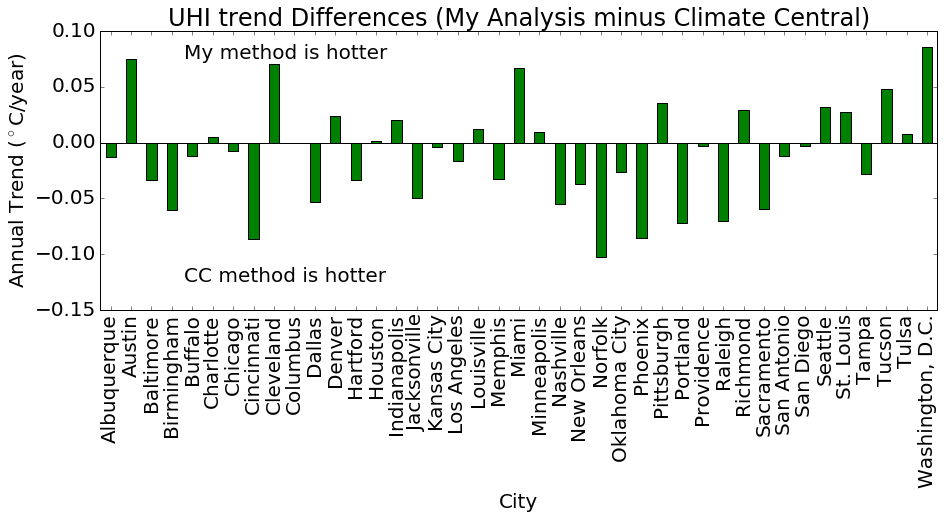

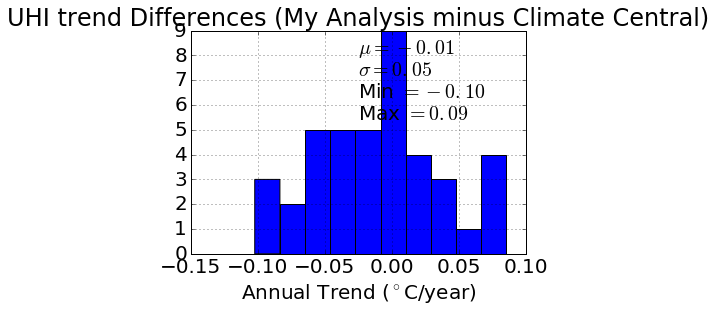

In [400]:
# Analyze the difference 
plt.figure(figsize=[15,5])
(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).plot(color = 'green', kind= 'bar')
plt.title('UHI trend Differences (My Analysis minus Climate Central)')
plt.ylabel('Annual Trend ($^\circ $C/year)')
plt.annotate('My method is hotter', xy = (.1, .9), xycoords='axes fraction')
plt.annotate('CC method is hotter', xy = (.1, .1), xycoords='axes fraction')
plt.axhline(0, color = 'black')
plt.figure()
(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).hist()
plt.annotate('$\mu = %.2f $'%(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).mean(), 
            xy=(.5, .9), xycoords='axes fraction')
plt.annotate('$\sigma = %.2f $'%(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).std(), 
            xy=(.5, .8), xycoords='axes fraction')
plt.annotate('Min $ = %.2f $'%(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).min(), 
            xy=(.5, .7), xycoords='axes fraction')
plt.annotate('Max $ = %.2f $'%(mydf.set_index('City').loc[combined_cities]['UHI linear trend']- ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']).max(), 
            xy=(.5, .6), xycoords='axes fraction')
plt.title('UHI trend Differences (My Analysis minus Climate Central)')
plt.xlabel('Annual Trend ($^\circ $C/year)')


My analysis is very similar to Climate Central's, though like the mean UHI analsyis has a very slight underestimation bias. For a trend analysis, a better way to analyze is to ask if we get the same sign: 

In [343]:
same_sign_cities = np.where((mydf.set_index('City').loc[combined_cities]['UHI linear trend'] > 0) & (ccUHIdf.set_index('City').loc[combined_cities]['UHI trend']>0))
print('Percentage of cities with the same sign: %2.2f '%(100*same_sign_cities[0].shape[0]/float(combined_cities.shape[0])))
print(mydf.loc[same_sign_cities].City)

Percentage of cities with the same sign: 41.46 
0               Mesa
4           Hartford
6         Birmingham
8     Virginia Beach
9            Oakland
13          Columbus
14          St. Paul
18       Kansas City
21           El Paso
23      Jacksonville
25          Richmond
27          San Jose
31    Salt Lake City
36         Cleveland
38         Nashville
39           Memphis
40           Norfolk
Name: City, dtype: object


In this sense, our analysis doesn't match very well- most cities have the opposite trend. 

In [4]:
# Are we using airport stations? 
pairs = pd.read_csv('USghcnpairs_stationlengths.csv')
paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]
import ulmo 
stations = ulmo.ncdc.ghcn_daily.get_stations(country='US', as_dataframe=True)

In [5]:
is_airport = []
for urban_station in paired_df['Urban station']: 
    if stations[stations.index== urban_station].name.str.contains('AP').values[0]: 
        is_airport.append(1)
print('%i percent (%i/%i) of my urban stations use airports '%(sum(is_airport)/float(paired_df.shape[0])*100,sum(is_airport),paired_df.shape[0] ))

49 percent (34/69) of my urban stations use airports 


In [6]:
is_airport = []
for urban_station in paired_df['Rural station']: 
    try: 
        if stations[stations.index== urban_station].name.str.contains('AP').values[0]: 
            is_airport.append(1)
            print(stations[stations.index== urban_station].name)
    except IndexError: 
        nothing =1
print('%i percent (%i/%i) of my rural stations use airports '%(sum(is_airport)/float(paired_df.shape[0])*100,sum(is_airport),paired_df.shape[0] ))

id
USW00023191    AVALON CATALINA AP
Name: name, dtype: object
id
USW00094281    AURORA STATE AP
Name: name, dtype: object
id
USW00053904    ST CHARLES CO AP
Name: name, dtype: object
4 percent (3/69) of my rural stations use airports 


In [93]:
# are urban areas with airport stations different? 
results_filename = 'US_results_cleaned_data.csv'
results_filepath = 'plots/version3/'
results_df = pd.read_csv(results_filepath + results_filename).drop(2)
drop_cities = ['Grand Prairie', 'Mesa','Long Beach','Virginia Beach', 'St. Paul' ]
results_df = results_df.set_index('City').drop(drop_cities)

In [94]:
drop_cities = ['Grand Prairie', 'Mesa','Long Beach','Virginia Beach', 'St. Paul' ]
pairs53 = paired_df.set_index('City').loc[results_df.index]#.drop(drop_cities)

In [75]:
urban_airport_cities = []
not_airport_cities = []
for city in pairs53.index: 
    urban_station = pairs53.loc[city]['Urban station']
    if stations[stations.index== urban_station].name.str.contains('AP').values[0]: 
        urban_airport_cities.append(city)
    else: 
        not_airport_cities.append(city)

In [63]:
results_df.columns

Index([u'Unnamed: 0', u'Slope', u'Intercepts', u'Residual', u'Correlation',
       u'P-value', u'Urban start date', u'Urban end date', u'Rural start date',
       u'Rural end date', u'Data points', u'Mean UHI', u'Day of Max UHI',
       u'Mean JJA Rural Temp', u'UHI linear trend',
       u'UHI linear trend p-value', u'hw Slope', u'hw P-value', u'hw Residual',
       u'hw Correlation', u'hw Data points', u'hw Mean UHI',
       u'hw Mean JJA Rural Temp'],
      dtype='object')

In [76]:
import scipy.stats 
scipy.stats.ttest_ind(results_df.loc[urban_airport_cities]['Mean UHI'].values,
                      results_df.loc[not_airport_cities]['Mean UHI'].values, equal_var = False)

Ttest_indResult(statistic=0.73004449561928053, pvalue=0.4687683127471487)

In [77]:
scipy.stats.ttest_ind(results_df.loc[urban_airport_cities]['UHI linear trend'].values,
                      results_df.loc[not_airport_cities]['UHI linear trend'].values, equal_var = False)

Ttest_indResult(statistic=-1.5803964679116085, pvalue=0.12108131016051457)

In [78]:
scipy.stats.ttest_ind(results_df.loc[urban_airport_cities]['Slope'].values,
                      results_df.loc[not_airport_cities]['Slope'].values, equal_var = False)

Ttest_indResult(statistic=-0.19306245131686381, pvalue=0.84776640804448378)

In [79]:
atlas = pd.read_csv('data/world_cities.csv')
atlas = atlas[atlas['pop']> 500000]
atlas = atlas[atlas['country'].str.contains('United States')] # do non-US countries

In [88]:
atlas.set_index('city').loc[pairs53.index]['pop']

(53,)

In [89]:
def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    #r = np.corrcoef(x[ind], y[ind])[0,1]
    r,p = scipy.stats.pearsonr(x[ind], y[ind])
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r= %.2f'%r, xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p= %.2f'%p, xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [91]:
atlas.set_index('city').loc[pairs53.index]['pop'].shape, results_df['Mean UHI'].shape

((53,), (58,))

(-1.4719303861670111e-10, -0.0041028196476523438, 0.97673949612718991)

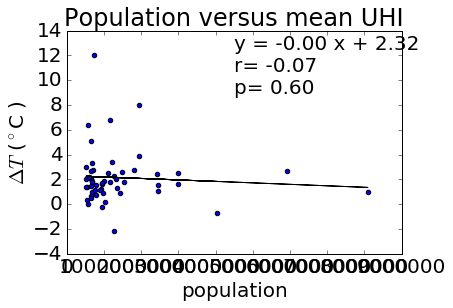

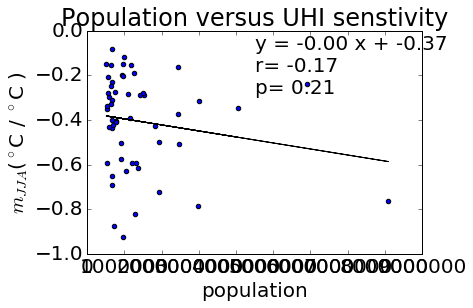

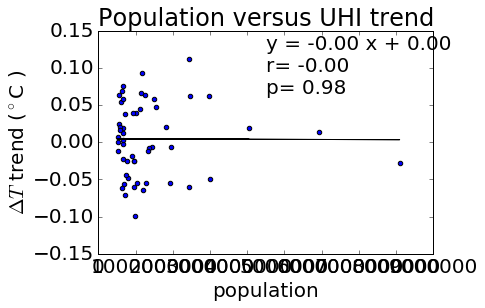

In [99]:
easy_scatter(atlas.set_index('city').loc[pairs53.index]['pop'], results_df['Mean UHI'], 
            'Population versus mean UHI', 'population', '$\Delta T$ ($^\circ$C )')

plt.figure()
easy_scatter(atlas.set_index('city').loc[pairs53.index]['pop'], results_df['Slope'], 
            'Population versus UHI senstivity', 'population', '$m_{JJA}$($^\circ$C / $^\circ$C )')

plt.figure()
easy_scatter(atlas.set_index('city').loc[pairs53.index]['pop'], results_df['UHI linear trend'], 
            'Population versus UHI trend', 'population', '$\Delta T$ trend ($^\circ$C )')